In [10]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


import xlsxwriter
import openpyxl
import pandas as pd
from matplotlib import rc
import matplotlib as mpl
import matplotlib.pyplot as plt

rc('font', family='Malgun Gothic')

import seaborn as sns

In [11]:
# 데이터불러오기

In [69]:
df_result = pd.read_excel("./Datas/df_result_merged.xlsx")
df_result

,Unnamed: 0,Unnamed: 0.1,Date_x,Daypart_x,Channel_x,Creative_x,Net Price,Audience,SPOT,I/B콜수,정기후원,후원금액,Category,Material,Asklevel,Model
0,0,0,2018-06-24,08시대,EDGETV,아동학대,128205.128205,12820.512821,1,2,1,20000,국내,아동학대,2만원,실제사례
1,1,4,2018-06-17,08시대,EDGETV,아동학대,128205.128205,12820.512821,1,1,1,20000,국내,아동학대,2만원,실제사례
2,2,12,2018-06-26,09시대,하이라이트,아동학대,41512.915129,4151.291513,1,0,0,0,국내,아동학대,2만원,실제사례
3,3,39,2018-06-16,09시대,하이라이트,아동학대,41512.915129,4151.291513,1,1,0,0,국내,아동학대,2만원,실제사례
4,4,40,2018-06-05,10시대,SKY트래블,아동학대,51071.598267,31113.000000,1,1,0,0,국내,아동학대,2만원,실제사례
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,64099,62917,2020-12-15,20시대,CNTV,안정환 조손가정,66666.666667,6666.666667,1,1,0,0,국내,생계비,2만원,셀럽
64100,64100,62918,2020-12-15,20시대,CNTV,안정환 조손가정,66666.666667,6666.666667,1,1,1,20000,국내,생계비,2만원,셀럽
64101,64101,62919,2020-12-15,20시대,CNTV,안정환 조손가정,66666.666667,6666.666667,1,1,0,0,국내,생계비,2만원,셀럽
64102,64102,62920,2020-12-15,20시대,CNTV,안정환 조손가정,66666.666667,6666.666667,1,1,0,0,국내,생계비,2만원,셀럽


In [70]:
# 데이터타입 확인하기
df_result.dtypes

Unnamed: 0               int64
Unnamed: 0.1             int64
Date_x          datetime64[ns]
Daypart_x               object
Channel_x               object
Creative_x              object
Net Price              float64
Audience               float64
SPOT                     int64
I/B콜수                    int64
정기후원                     int64
후원금액                     int64
Category                object
Material                object
Asklevel                object
Model                   object
dtype: object

In [71]:
# Unnamed: 0과 Unnamed:0.1 드롭
df_result = df_result.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [75]:
# 데이터타입을 바꿔주기 위해서 Net Price 명칭 변경
df_result = df_result.rename({'Net Price':'Net_Price',
                              'Date_x':'Date',
                              'Daypart_x':'Daypart',
                              'Channel_x':'Channel',
                              'Creative_x':'Creative',
                              'I/B콜수':'Inbound_Calls',
                              '정기후원':'Reg_Donour',
                              '후원금액':'RD_Amount'}, axis='columns')

In [76]:
# Audience와 Net_Price의 데이터타입을 int64로 변경
df_result['Audience'] = df_result.Audience.astype('int64')
df_result['Net_Price'] = df_result.Net_Price.astype('int64')

In [77]:
df_result.head()

,Date,Daypart,Channel,Creative,Net_Price,Audience,SPOT,Inbound_Calls,Reg_Donour,RD_Amount,Category,Material,Asklevel,Model
0,2018-06-24,08시대,EDGETV,아동학대,128205,12820,1,2,1,20000,국내,아동학대,2만원,실제사례
1,2018-06-17,08시대,EDGETV,아동학대,128205,12820,1,1,1,20000,국내,아동학대,2만원,실제사례
2,2018-06-26,09시대,하이라이트,아동학대,41512,4151,1,0,0,0,국내,아동학대,2만원,실제사례
3,2018-06-16,09시대,하이라이트,아동학대,41512,4151,1,1,0,0,국내,아동학대,2만원,실제사례
4,2018-06-05,10시대,SKY트래블,아동학대,51071,31113,1,1,0,0,국내,아동학대,2만원,실제사례


In [123]:
#df_result[(df_result['Audience']!=0) | (df_result['Net_Price']!=0) | (df_result['Inbound_Calls']!=0) | (df_result['RD_Amount']!=0)].info()

In [124]:
#df_result[(df_result['Audience']==0) & (df_result['Net_Price']==0) & (df_result['Inbound_Calls']==0) & (df_result['RD_Amount']==0)].info()

In [127]:
df_result["Daypart"].unique()

array(['08시대', '09시대', '10시대', '11시대', '12시대', '13시대', '14시대', '15시대',
       '16시대', '17시대', '18시대', '19시대', '20시대', '21시대', '23시대', '22시대',
       '07시대', '04시대', '02시대', '03시대', '05시대', '06시대', '01시대', '24시대'],
      dtype=object)

In [162]:
df_result["Daypart_Group"] = "d"

In [166]:
# 1. Early_Morning
df_result["Daypart_Group"][(df_result['Daypart'] == "08시대") | (df_result['Daypart'] == "09시대") | (df_result['Daypart'] == "10시대")]= "Early_morning"

In [169]:
# 2. Noon
df_result["Daypart_Group"][(df_result['Daypart'] == "11시대") | (df_result['Daypart'] == "12시대") | (df_result['Daypart'] == "13시대")] = "Noon"

In [170]:
# 3. Early_Afternoon
df_result["Daypart_Group"][(df_result['Daypart'] == "14시대") | (df_result['Daypart'] == "15시대") | (df_result['Daypart'] == "16시대")] = "Early_Afternoon"

In [171]:
# 4. Late_Afternoon
df_result["Daypart_Group"][(df_result['Daypart'] == "17시대") | (df_result['Daypart'] == "18시대") | (df_result['Daypart'] == "19시대")]="Late_Afternoon"

In [172]:
# 5. Midnight
df_result["Daypart_Group"][(df_result['Daypart'] == "20시대") | (df_result['Daypart'] == "21시대") | (df_result['Daypart'] == "22시대")]="Mid_night"

In [173]:
df_result

,Date,Daypart,Channel,Creative,Net_Price,Audience,SPOT,Inbound_Calls,Reg_Donour,RD_Amount,Category,Material,Asklevel,Model,Daypart_Group
0,2018-06-24,08시대,EDGETV,아동학대,128205,12820,1,2,1,20000,국내,아동학대,2만원,실제사례,Early_morning
1,2018-06-17,08시대,EDGETV,아동학대,128205,12820,1,1,1,20000,국내,아동학대,2만원,실제사례,Early_morning
2,2018-06-26,09시대,하이라이트,아동학대,41512,4151,1,0,0,0,국내,아동학대,2만원,실제사례,Early_morning
3,2018-06-16,09시대,하이라이트,아동학대,41512,4151,1,1,0,0,국내,아동학대,2만원,실제사례,Early_morning
4,2018-06-05,10시대,SKY트래블,아동학대,51071,31113,1,1,0,0,국내,아동학대,2만원,실제사례,Early_morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,2020-12-15,20시대,CNTV,안정환 조손가정,66666,6666,1,1,0,0,국내,생계비,2만원,셀럽,Mid_night
64100,2020-12-15,20시대,CNTV,안정환 조손가정,66666,6666,1,1,1,20000,국내,생계비,2만원,셀럽,Mid_night
64101,2020-12-15,20시대,CNTV,안정환 조손가정,66666,6666,1,1,0,0,국내,생계비,2만원,셀럽,Mid_night
64102,2020-12-15,20시대,CNTV,안정환 조손가정,66666,6666,1,1,0,0,국내,생계비,2만원,셀럽,Mid_night


In [253]:
# 채널별 시간대별 Audience 수
df_result['Audience'].fillna(0)

pdf1 = pd.pivot_table(df_result[df_result['Daypart_Group'] !="d"], 
                     index = 'Channel',
                     columns = 'Daypart_Group',
                     values = 'Audience',
                     aggfunc = ['mean']
                     )
pdf1 = pdf1.fillna(0)
pdf1 = pdf1.astype("int")
pdf1 = pdf1["mean"].sort_values(by="Early_Afternoon", ascending=False)
pdf1.head(10)

Daypart_Group,Early_Afternoon,Early_morning,Late_Afternoon,Mid_night,Noon
Channel,,,,,
SBS,72032,92422,133084,0,46081
TV조선,66525,39615,46603,0,33534
YTN,62364,72446,52430,37012,58838
연합뉴스,62290,63692,42327,41727,55272
EBS,56003,34342,98000,101245,63062
MBN,46283,63408,77969,110020,53030
KBS2,38899,55604,60425,0,0
채널A,37456,48548,56567,13209,47160
TV CHOSUN2,32741,6405,23113,11917,15088


<AxesSubplot:title={'center':'채널별 시간대별 Audience(일평균)'}, xlabel='Daypart_Group', ylabel='Channel'>

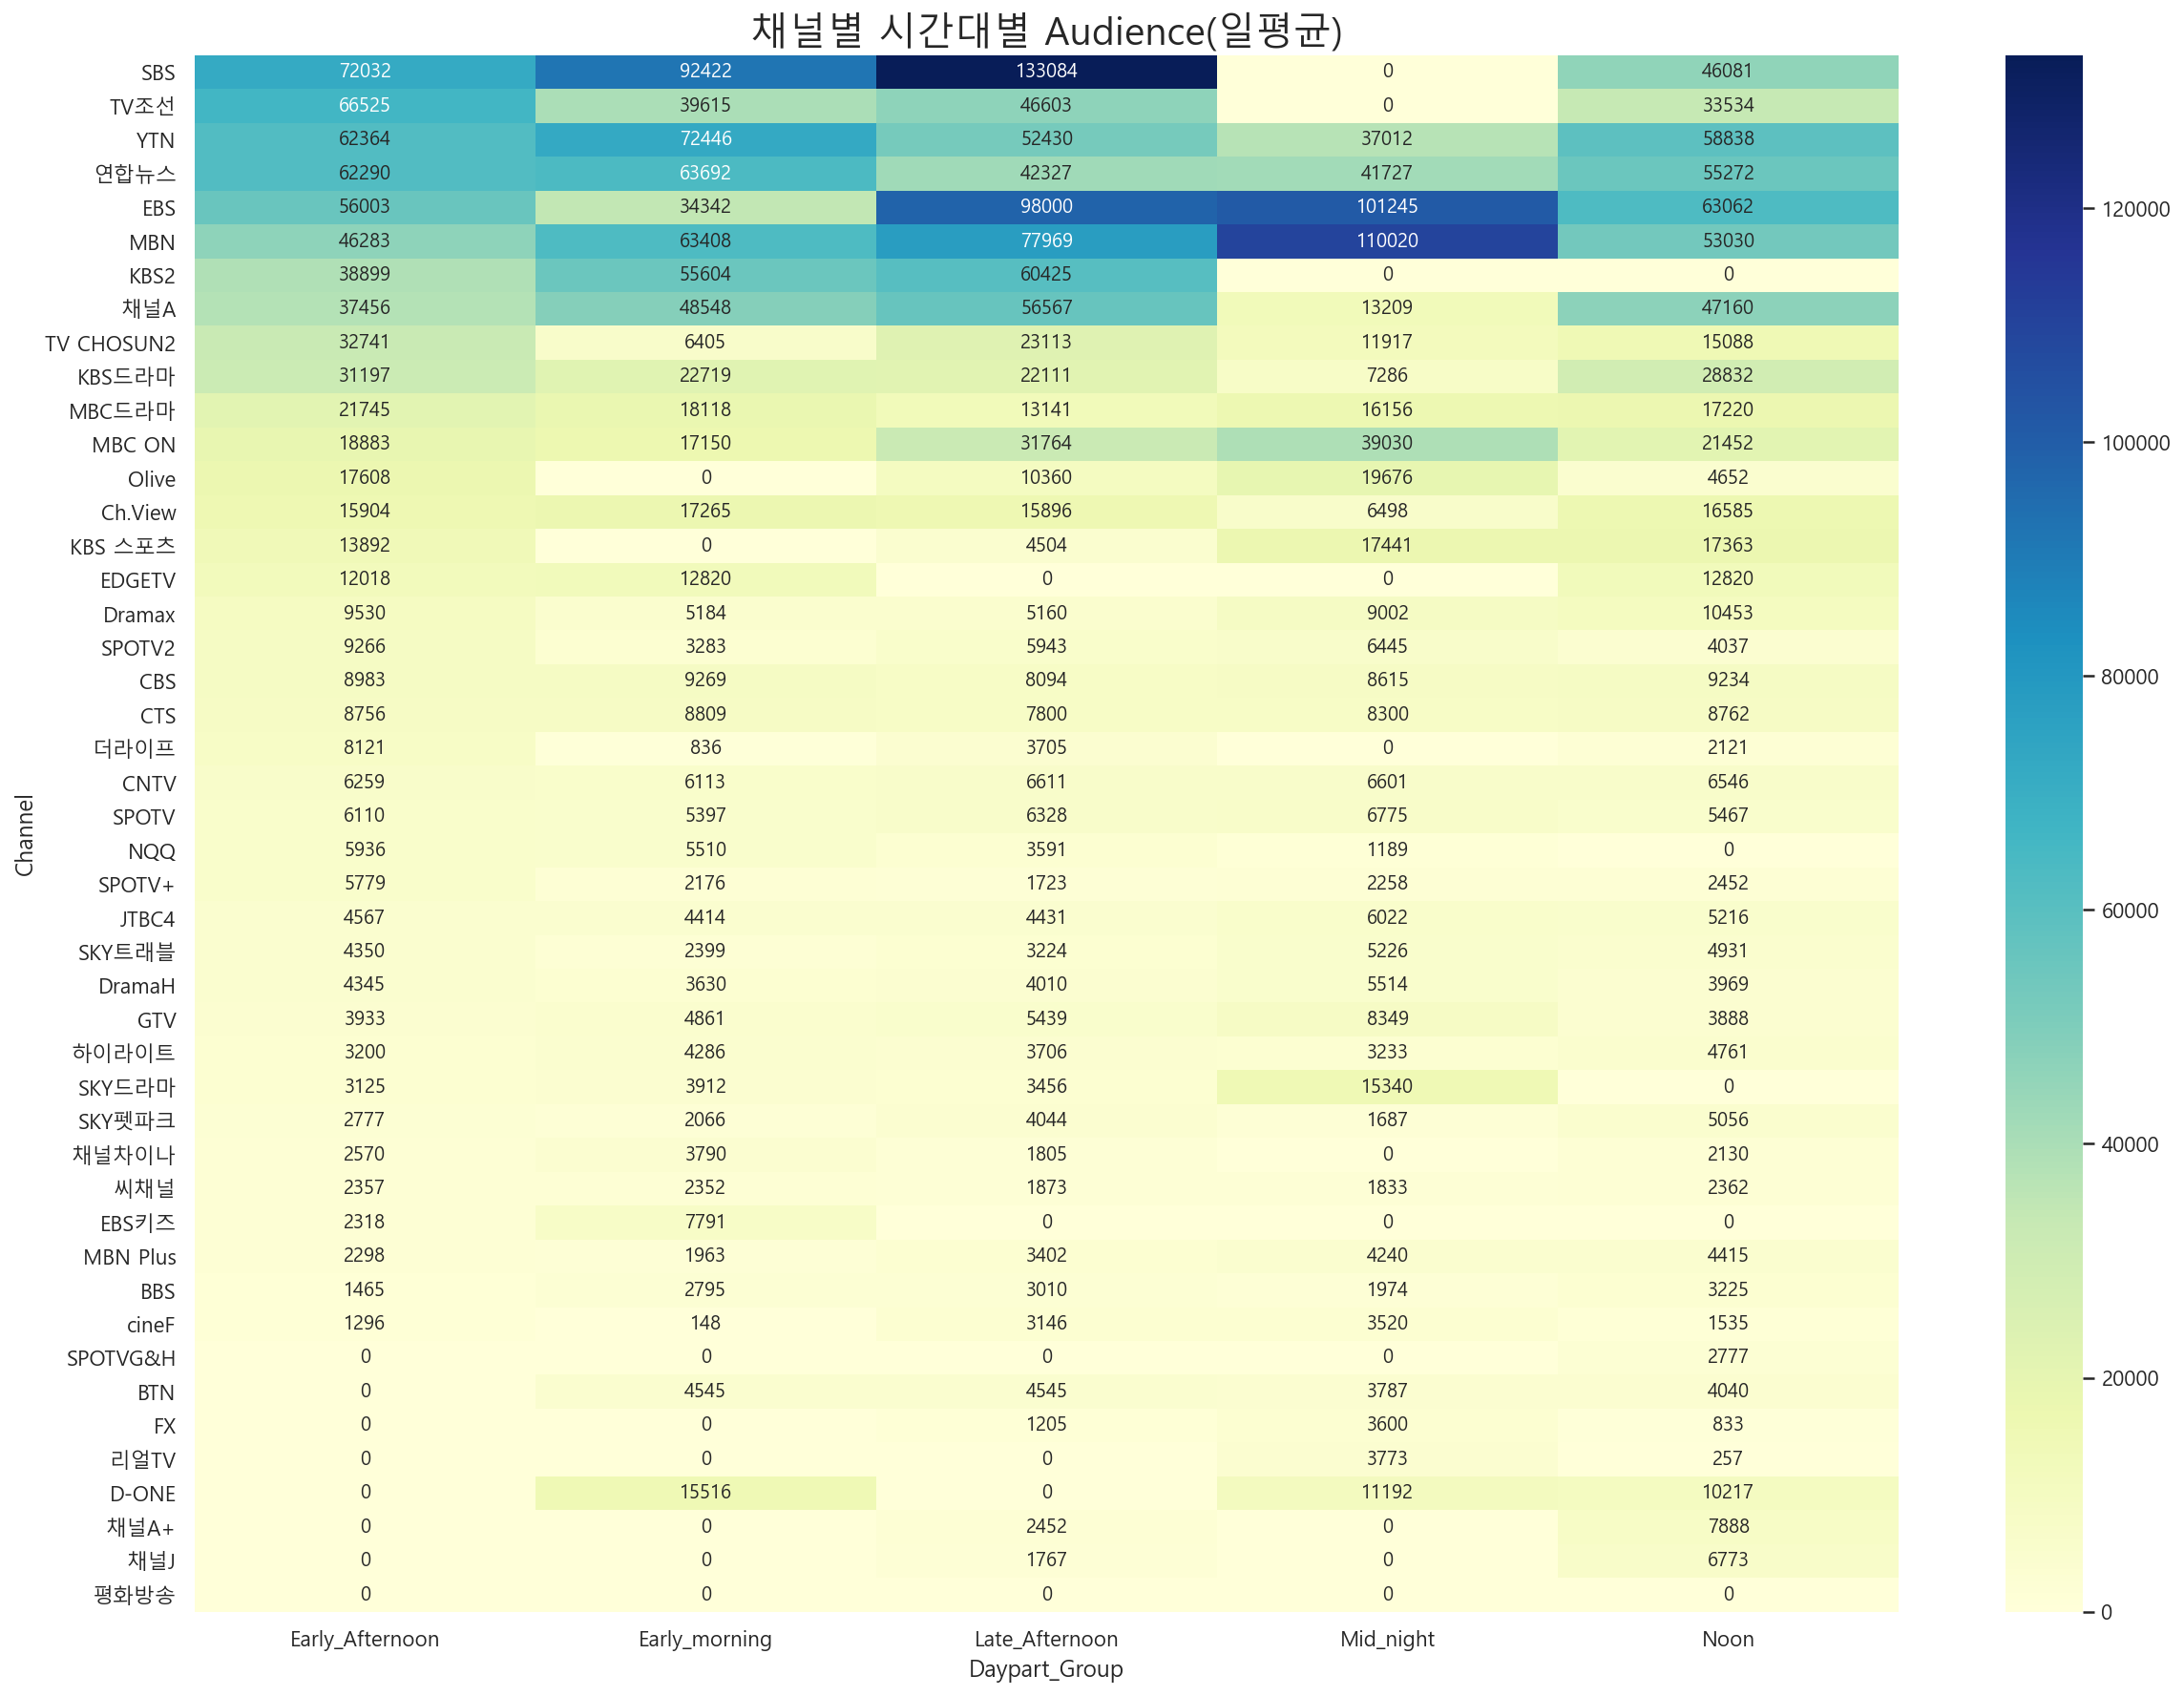

In [252]:
plt.figure(figsize=(20,15))
plt.title("채널별 시간대별 Audience(일평균)", fontsize=20) 
sns.heatmap(data=pdf1, annot=True, cmap="YlGnBu", fmt='d')

In [258]:
# 채널별 시간대별 Inbound 콜
df_result['Inbound_Calls'].fillna(0)

pdf2 = pd.pivot_table(df_result[df_result['Daypart_Group'] !="d"], 
                     index = 'Channel',
                     columns = 'Daypart_Group',
                     values = 'Inbound_Calls',
                     aggfunc = ['mean']
                     )
pdf2 = pdf2.fillna(0)
pdf2 = pdf2.astype("int")
pdf2 = pdf2["mean"].sort_values(by="Early_Afternoon", ascending=False)
pdf2.head(10)

Daypart_Group,Early_Afternoon,Early_morning,Late_Afternoon,Mid_night,Noon
Channel,,,,,
EBS,2,2,4,3,2
YTN,2,2,2,2,2
연합뉴스,2,1,2,2,2
SPOTV,1,1,1,1,1
MBN Plus,1,1,1,1,1
NQQ,1,1,1,1,1
SBS,1,1,1,0,1
SKY드라마,1,1,1,2,0
SKY트래블,1,1,1,0,0


<AxesSubplot:title={'center':'채널별 시간대별 인바운드콜수(일평균)'}, xlabel='Daypart_Group', ylabel='Channel'>

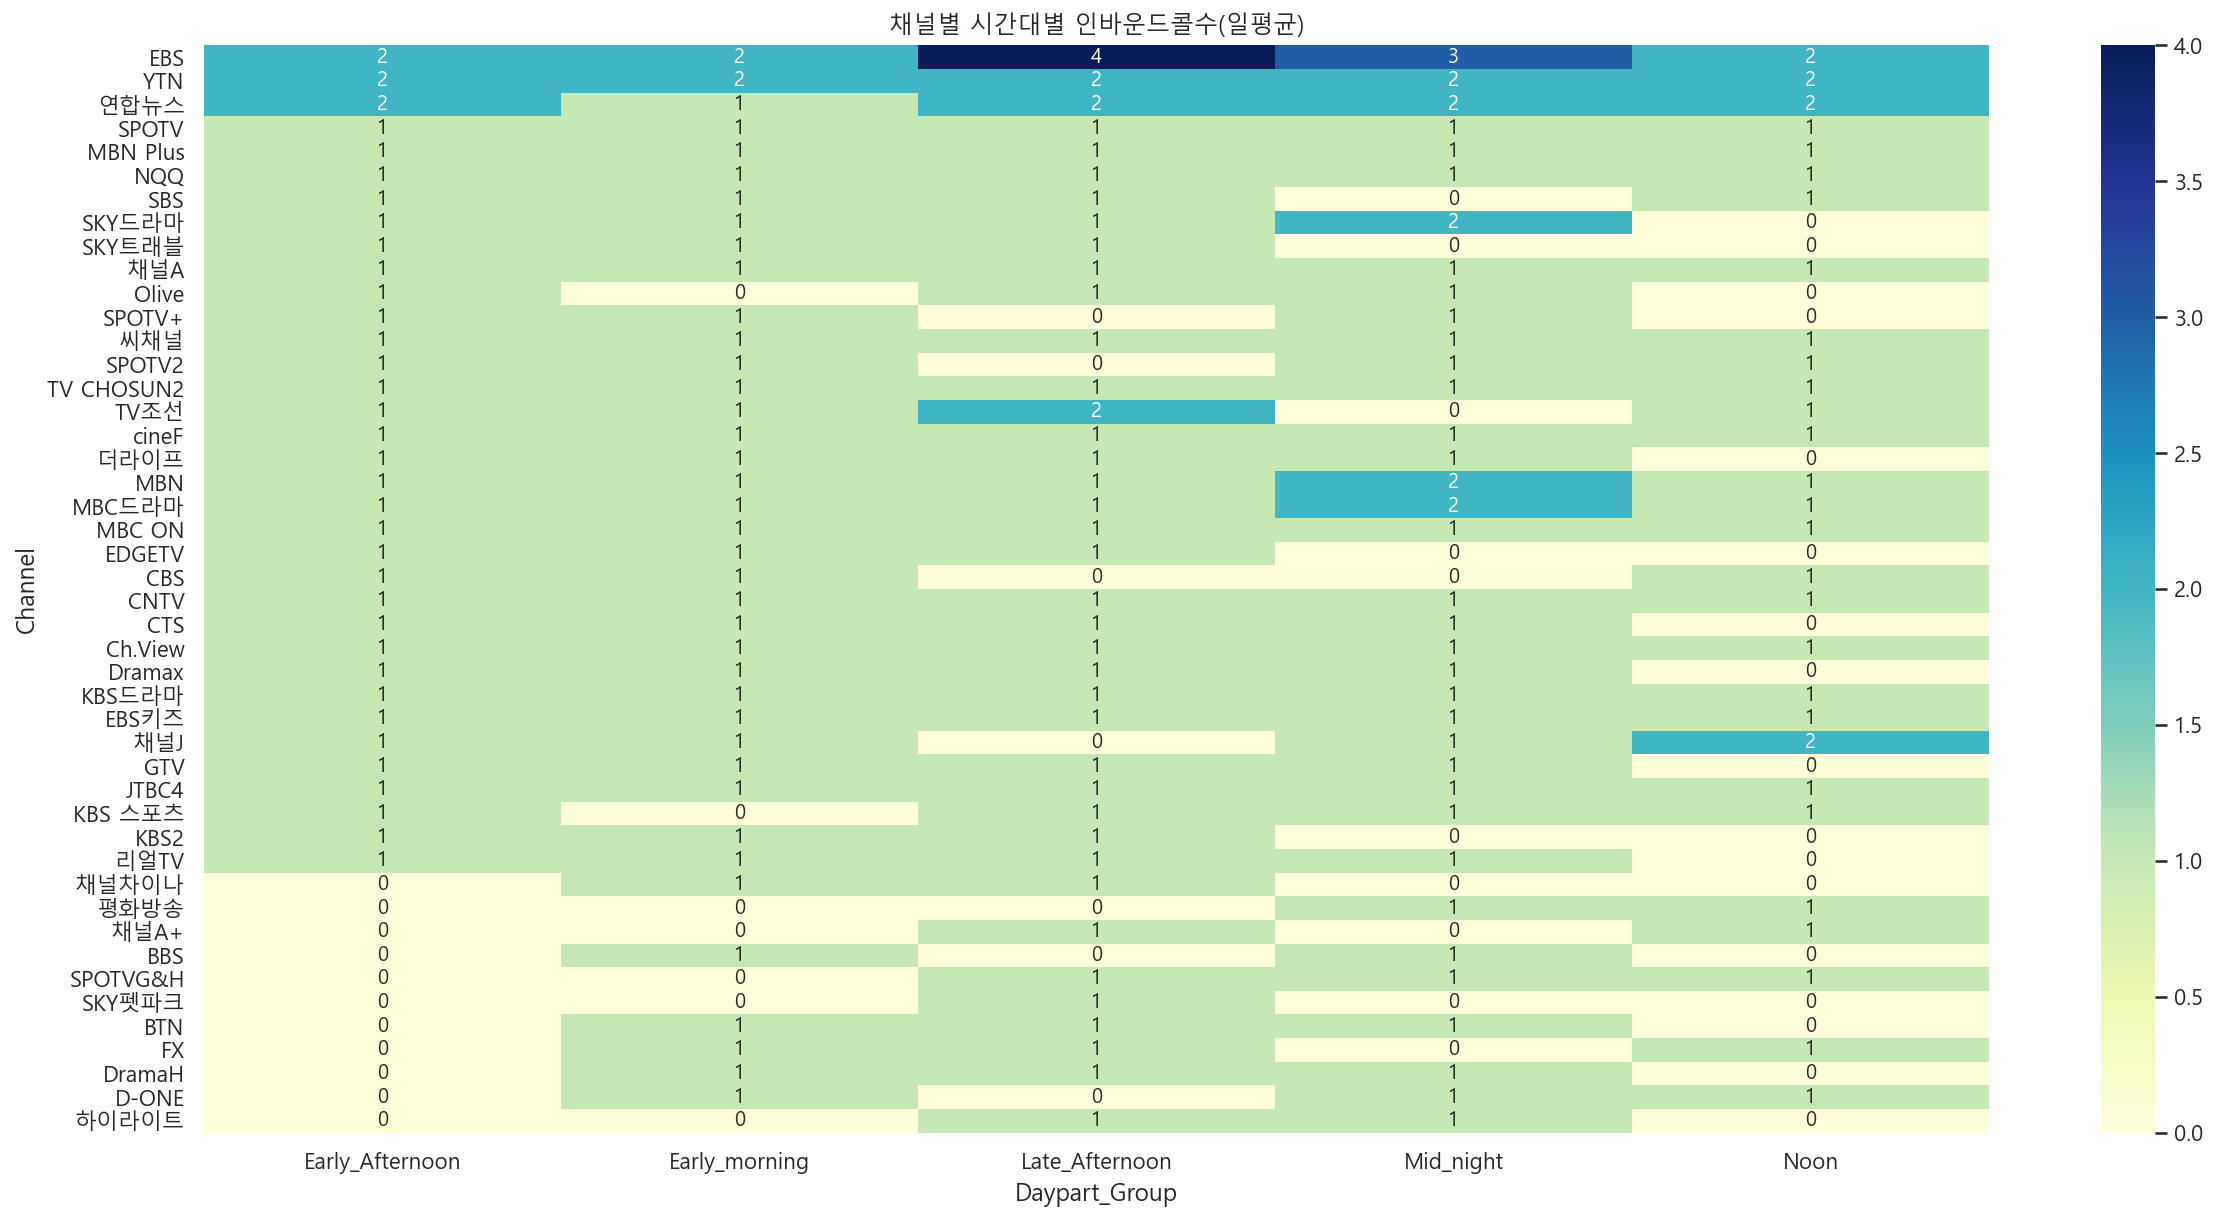

In [259]:
plt.figure(figsize=(20,10))
plt.title("채널별 시간대별 인바운드콜수(일평균)")
sns.heatmap(data=pdf2, annot=True, cmap="YlGnBu", fmt='d')

In [263]:
# 채널별 시간대별 후원금액
df_result['RD_Amount'].fillna(0)

pdf3 = pd.pivot_table(df_result[df_result['Daypart_Group'] !="d"], 
                     index = 'Channel',
                     columns = 'Daypart_Group',
                     values = 'RD_Amount',
                     aggfunc = ['sum']
                     )
pdf3 = pdf3.fillna(0)
pdf3 = pdf3.astype("int")
pdf3 = pdf3["sum"].sort_values(by="Early_Afternoon", ascending=False)
pdf3.head(10)

Daypart_Group,Early_Afternoon,Early_morning,Late_Afternoon,Mid_night,Noon
Channel,,,,,
MBN Plus,23190000,13620000,12615000,13510000,26840000
씨채널,10975000,6145000,14665000,4615000,15705000
cineF,10455000,1930000,3430000,125000,7475000
EBS,9452000,40000,57507000,105717500,5965000
TV CHOSUN2,9095000,10960000,14025000,3935000,5715000
CNTV,7545000,5495000,3235000,5675000,980000
연합뉴스,4535000,5365000,30610000,4365000,29280000
SPOTV,4230000,2800000,3930000,3665000,4918000
NQQ,3560000,5340000,3560000,890000,445000


<AxesSubplot:title={'center':'채널별 시간대별 후원금'}, xlabel='Daypart_Group', ylabel='Channel'>

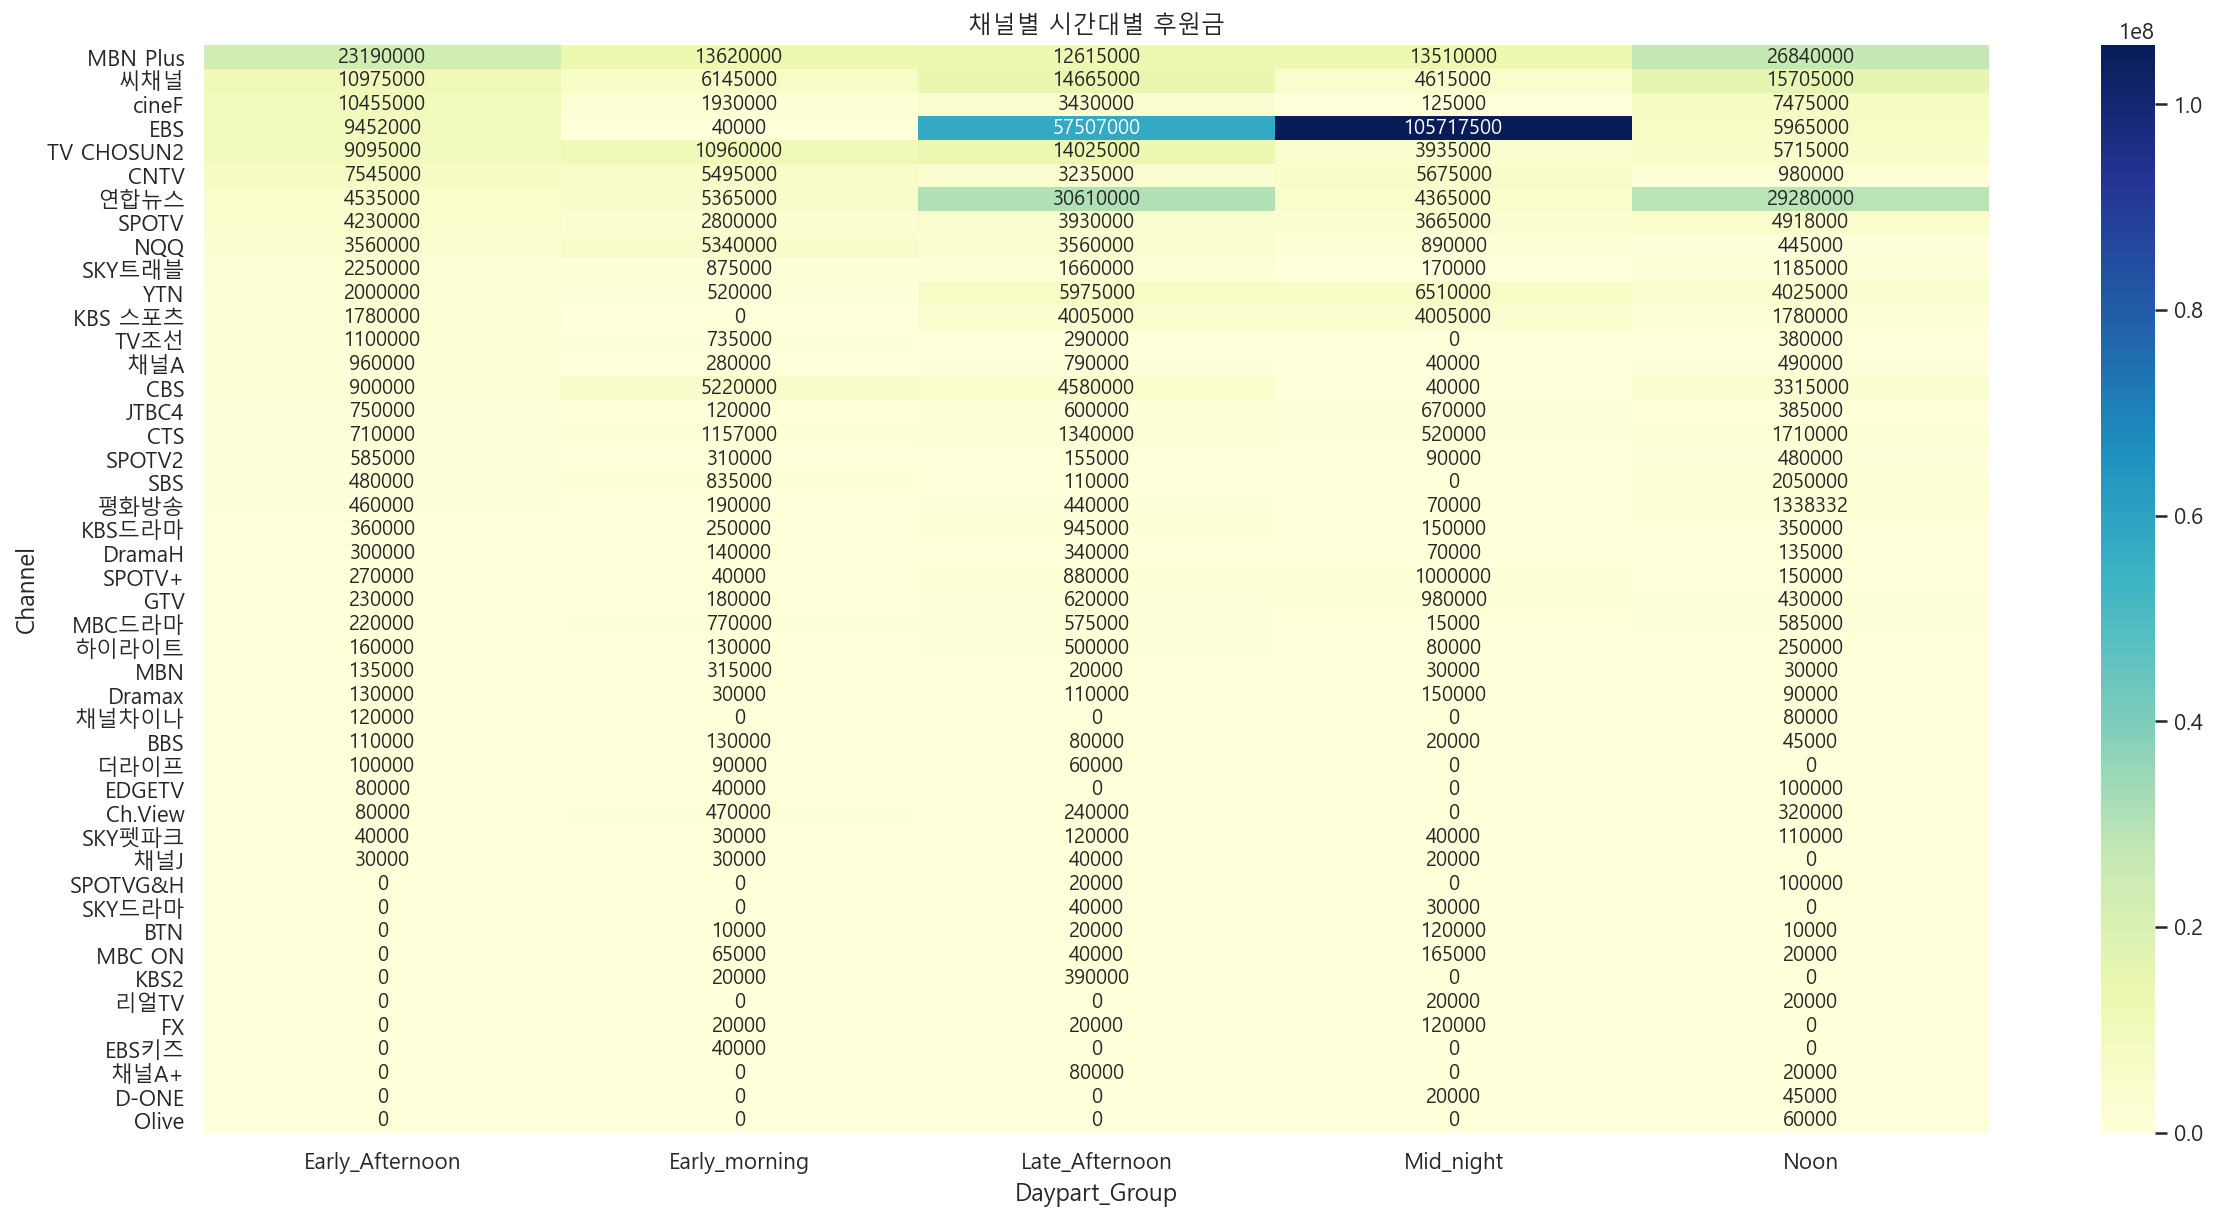

In [265]:
plt.figure(figsize=(20,10))
plt.title("채널별 시간대별 후원금")
sns.heatmap(data=pdf3, annot=True, cmap="YlGnBu", fmt='d')

In [278]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           64104 non-null  datetime64[ns]
 1   Daypart        64104 non-null  object        
 2   Channel        64104 non-null  object        
 3   Creative       64104 non-null  object        
 4   Net_Price      64104 non-null  int64         
 5   Audience       64104 non-null  int64         
 6   SPOT           64104 non-null  int64         
 7   Inbound_Calls  64104 non-null  int64         
 8   Reg_Donour     64104 non-null  int64         
 9   RD_Amount      64104 non-null  int64         
 10  Category       64104 non-null  object        
 11  Material       64104 non-null  object        
 12  Asklevel       64104 non-null  object        
 13  Model          64104 non-null  object        
 14  Daypart_Group  64104 non-null  object        
dtypes: datetime64[ns](1

In [279]:
pdf = pd.pivot_table(df_result, 
                     index = ['Date','Channel','Daypart_Group'],
                     values = ['Net_Price','Audience','SPOT','Inbound_Calls', 'RD_Amount'],
                     aggfunc = ['sum']
                     )
pdf = pdf.astype("int")
pdf['sum']

Audience  Inbound_Calls  Net_Price  \
Date       Channel Daypart_Group                                         
2018-01-02 Ch.View Noon                    0              1     116731   
           MBC드라마  Early_morning       18050              1     119047   
           SKY트래블  Early_morning           0              1      28248   
           TV조선    Noon                    0              8     112029   
           연합뉴스    Noon                48864              2     357142   
...                                      ...            ...        ...   
2020-12-14 CNTV    Mid_night          493284             78    4933284   
2020-12-15 CNTV    Early_Afternoon         0             78          0   
                   Early_morning           0             78          0   
                   Late_Afternoon     493284             78    4933284   
                   Mid_night          493284             78    4933284   

                                    RD_Amount  SPOT  
Date       Channel Daypart_Group                     
2018-01-02 Ch.View Noon                     0     1  
           MBC드라마  Early_morning            0     1  
           SKY트래블  Early_morning        50000     1  
           TV조선    Noon                     0     2  
           연합뉴스    Noon                 50000     2  
...                                       ...   ...  
2020-12-14 CNTV    Mid_night           445000    74  
2020-12-15 CNTV    Early_Afternoon     445000    74  
                   Early_morning       445000    74  
                   Late_Afternoon      445000    74  
                   Mid_night           445000    74  

[11288 rows x 5 columns]

In [272]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11288 entries, (Timestamp('2018-01-02 00:00:00'), 'Ch.View', 'Noon') to (Timestamp('2020-12-15 00:00:00'), 'CNTV', 'Mid_night')
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   (sum, Audience)       11288 non-null  int32
 1   (sum, Inbound_Calls)  11288 non-null  int32
 2   (sum, Net_Price)      11288 non-null  int32
 3   (sum, RD_Amount)      11288 non-null  int32
 4   (sum, SPOT)           11288 non-null  int32
dtypes: int32(5)
memory usage: 273.4+ KB


In [275]:
cdf = pd.pivot_table(df_result, 
                     index = ['Date','Channel','Category'],
                     values = ['Net_Price','Audience','SPOT','Inbound_Calls', 'RD_Amount'],
                     aggfunc = ['sum']
                     )
cdf = cdf.astype("int")
cdf.head(10)

sum                                       
                            Audience Inbound_Calls Net_Price RD_Amount SPOT
Date       Channel Category                                                
2018-01-02 Ch.View 국내              0             1    116731         0    1
           MBC드라마  해외          18050             1    119047         0    1
           SKY트래블  해외              0             1     28248     50000    1
           TV조선    해외              0             8    112029         0    2
           연합뉴스    해외          48864             2    357142     50000    2
2018-01-03 CBS     국내           8346             1     83465         0    1
           Ch.View 국내          17579             3         0     10000    2
           MBC드라마  해외          18366             1    119047         0    1
           연합뉴스    해외          26347             1    178571         0    1
2018-01-04 CBS     국내          23844             4    238472     20000    4

In [295]:
reg1 = cdf["sum"].reset_index()

In [331]:
reg1["ROI"] = round(reg1["RD_Amount"]*12 / reg1['Net_Price'], 1)
reg1 = reg1.fillna(0)
reg1.head(1)

,Date,Channel,Category,Audience,Inbound_Calls,Net_Price,RD_Amount,SPOT,ROI
0,2018-01-02,Ch.View,국내,0,1,116731,0,1,0.0


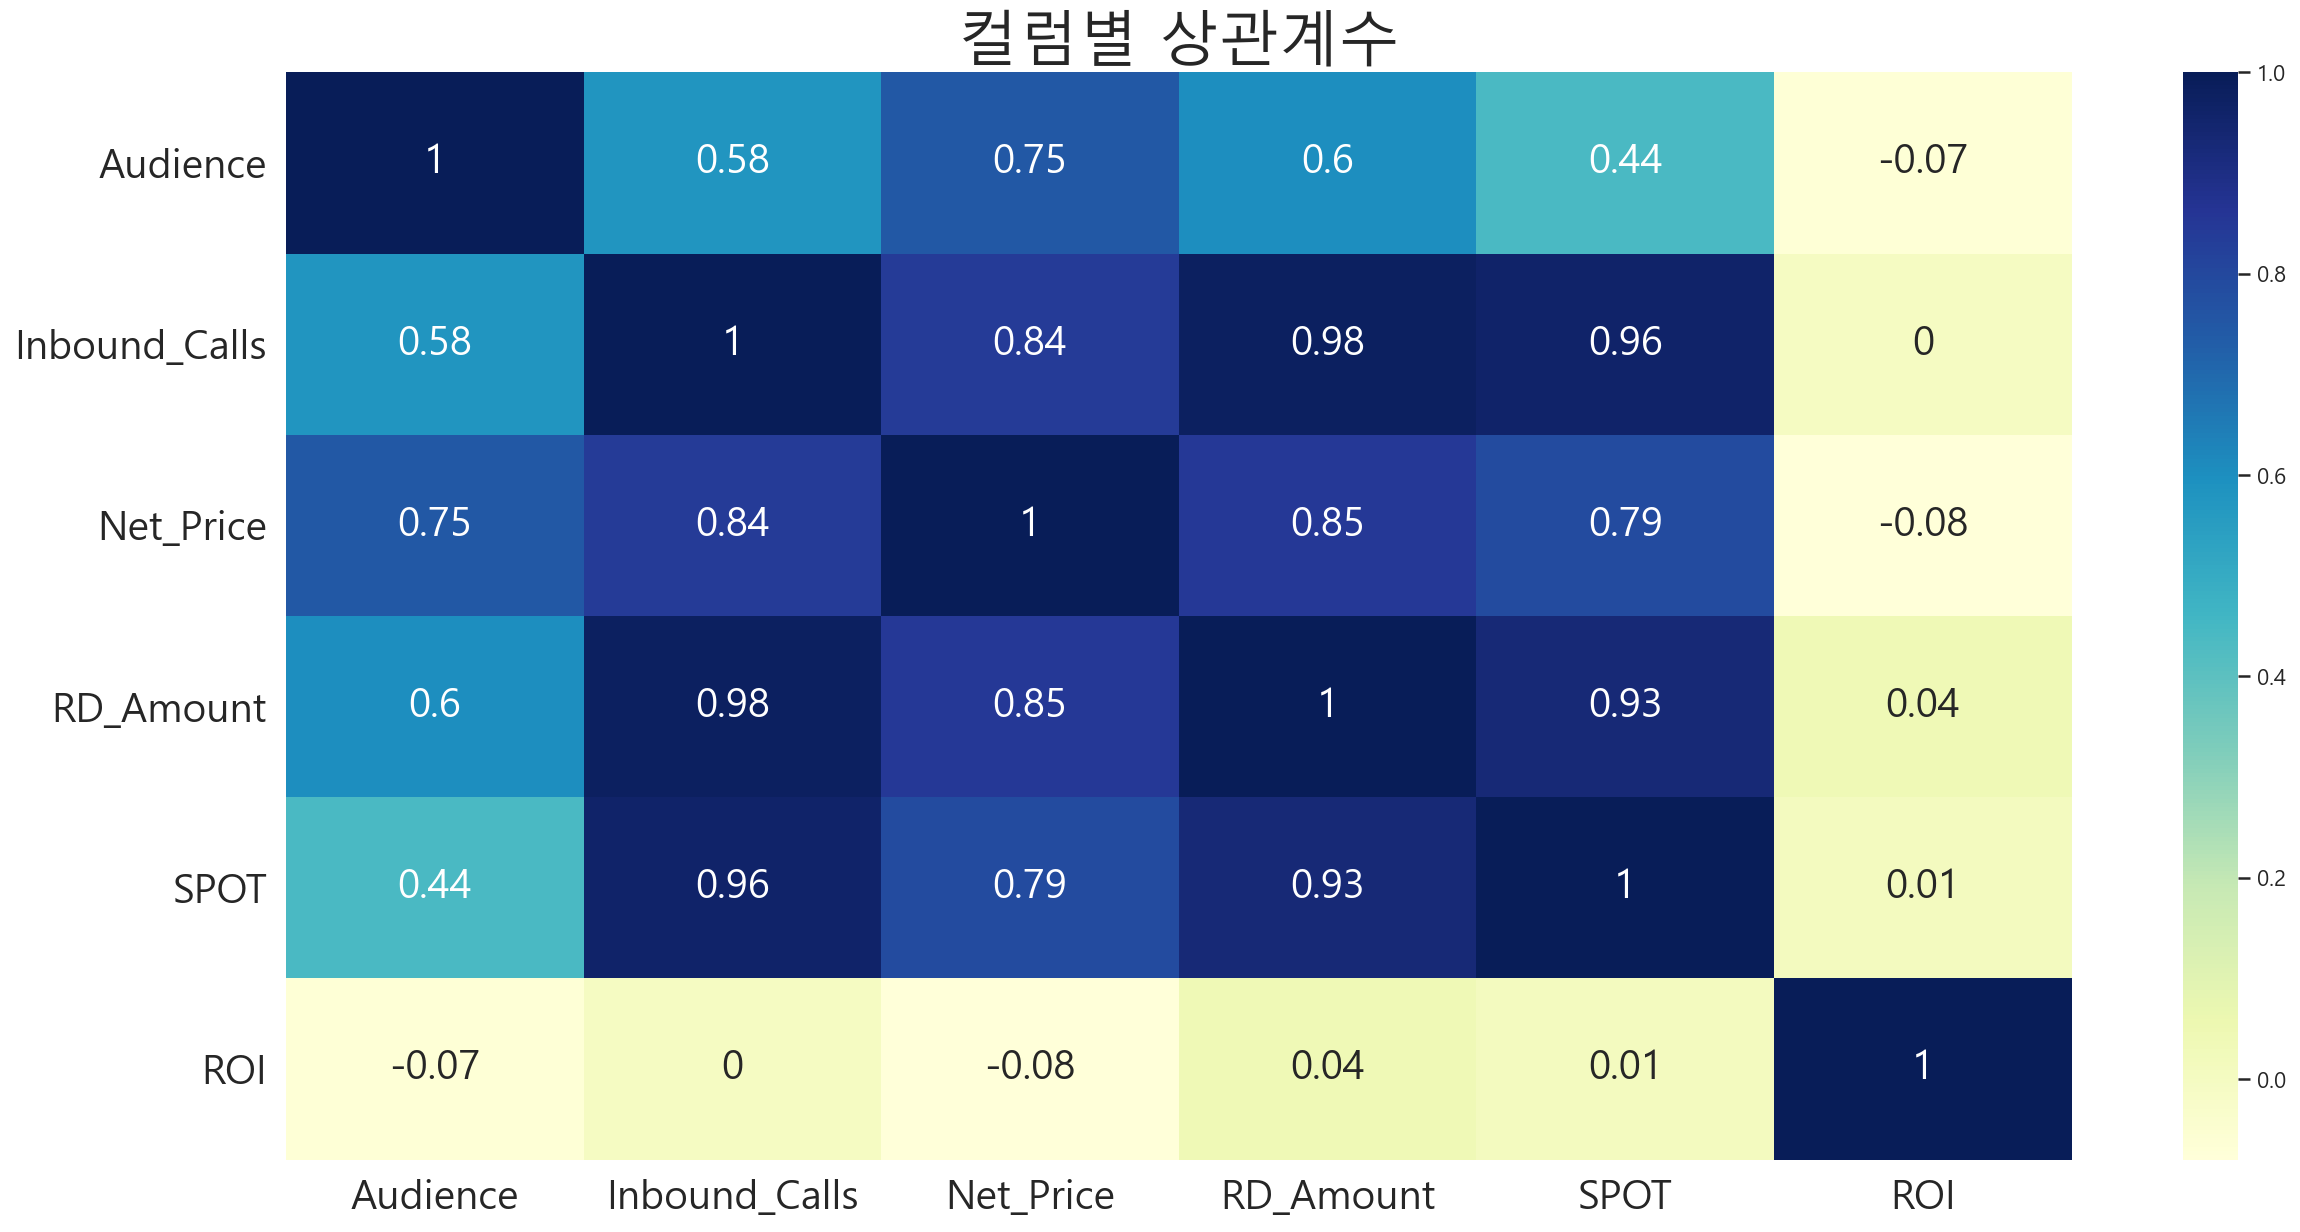

In [330]:
plt.figure(figsize=(20,10))
plt.title("컬럼별 상관계수", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(data=round(reg1.corr(),2), annot=True, cmap="YlGnBu", annot_kws={"size": 20})
plt.show()

In [360]:
reg1_onehot = pd.get_dummies(reg1, columns=['Category'], drop_first=True)
reg1_onehot["Category_국내"] = 1-reg1_onehot["Category_해외"]
reg1_onehot

,Date,Channel,Audience,Inbound_Calls,Net_Price,RD_Amount,SPOT,ROI,Category_해외,Category_국내
0,2018-01-02,Ch.View,0,1,116731,0,1,0.0,0,1
1,2018-01-02,MBC드라마,18050,1,119047,0,1,0.0,1,0
2,2018-01-02,SKY트래블,0,1,28248,50000,1,21.2,1,0
3,2018-01-02,TV조선,0,8,112029,0,2,0.0,1,0
4,2018-01-02,연합뉴스,48864,2,357142,50000,2,1.7,1,0
...,...,...,...,...,...,...,...,...,...,...
6293,2020-12-13,cineF,32756,1,0,0,1,0.0,1,0
6294,2020-12-13,씨채널,1058496,468,10585404,2670000,444,3.0,0,1
6295,2020-12-13,연합뉴스,665231,28,2297294,150000,9,0.8,0,1
6296,2020-12-14,CNTV,1973136,312,19733136,1780000,296,1.1,0,1


In [361]:
reg1_onehot_fn = reg1_onehot.drop(['Date', 'Audience', 'Net_Price', 'RD_Amount', 'SPOT','Inbound_Calls'], axis=1)

In [362]:
reg1_onehot_fn

,Channel,ROI,Category_해외,Category_국내
0,Ch.View,0.0,0,1
1,MBC드라마,0.0,1,0
2,SKY트래블,21.2,1,0
3,TV조선,0.0,1,0
4,연합뉴스,1.7,1,0
...,...,...,...,...
6293,cineF,0.0,1,0
6294,씨채널,3.0,0,1
6295,연합뉴스,0.8,0,1
6296,CNTV,1.1,0,1


In [366]:
ch = "연합뉴스"
reg1_onehot_fn[reg1_onehot_fn['Channel']==ch]

,Channel,ROI,Category_해외,Category_국내
4,연합뉴스,1.7,1,0
8,연합뉴스,0.0,1,0
13,연합뉴스,0.0,1,0
19,연합뉴스,0.7,1,0
26,연합뉴스,0.7,1,0
...,...,...,...,...
6249,연합뉴스,0.7,0,1
6261,연합뉴스,0.7,0,1
6273,연합뉴스,0.4,0,1
6282,연합뉴스,0.5,0,1


In [369]:
sample_data = reg1_onehot[reg1["Channel"]==ch]

,Date,Channel,Audience,Inbound_Calls,Net_Price,RD_Amount,SPOT,ROI,Category_해외,Category_국내
4,2018-01-02,연합뉴스,48864,2,357142,50000,2,1.7,1,0
8,2018-01-03,연합뉴스,26347,1,178571,0,1,0.0,1,0
13,2018-01-04,연합뉴스,22368,2,178571,0,1,0.0,1,0
19,2018-01-05,연합뉴스,61390,3,357142,20000,2,0.7,1,0
26,2018-01-06,연합뉴스,108963,4,357142,20000,2,0.7,1,0
...,...,...,...,...,...,...,...,...,...,...
6249,2020-12-09,연합뉴스,161540,6,675674,40000,2,0.7,0,1
6261,2020-12-10,연합뉴스,221552,4,337837,20000,3,0.7,0,1
6273,2020-12-11,연합뉴스,213600,5,675674,20000,3,0.4,0,1
6282,2020-12-12,연합뉴스,819829,36,2635131,110000,11,0.5,0,1


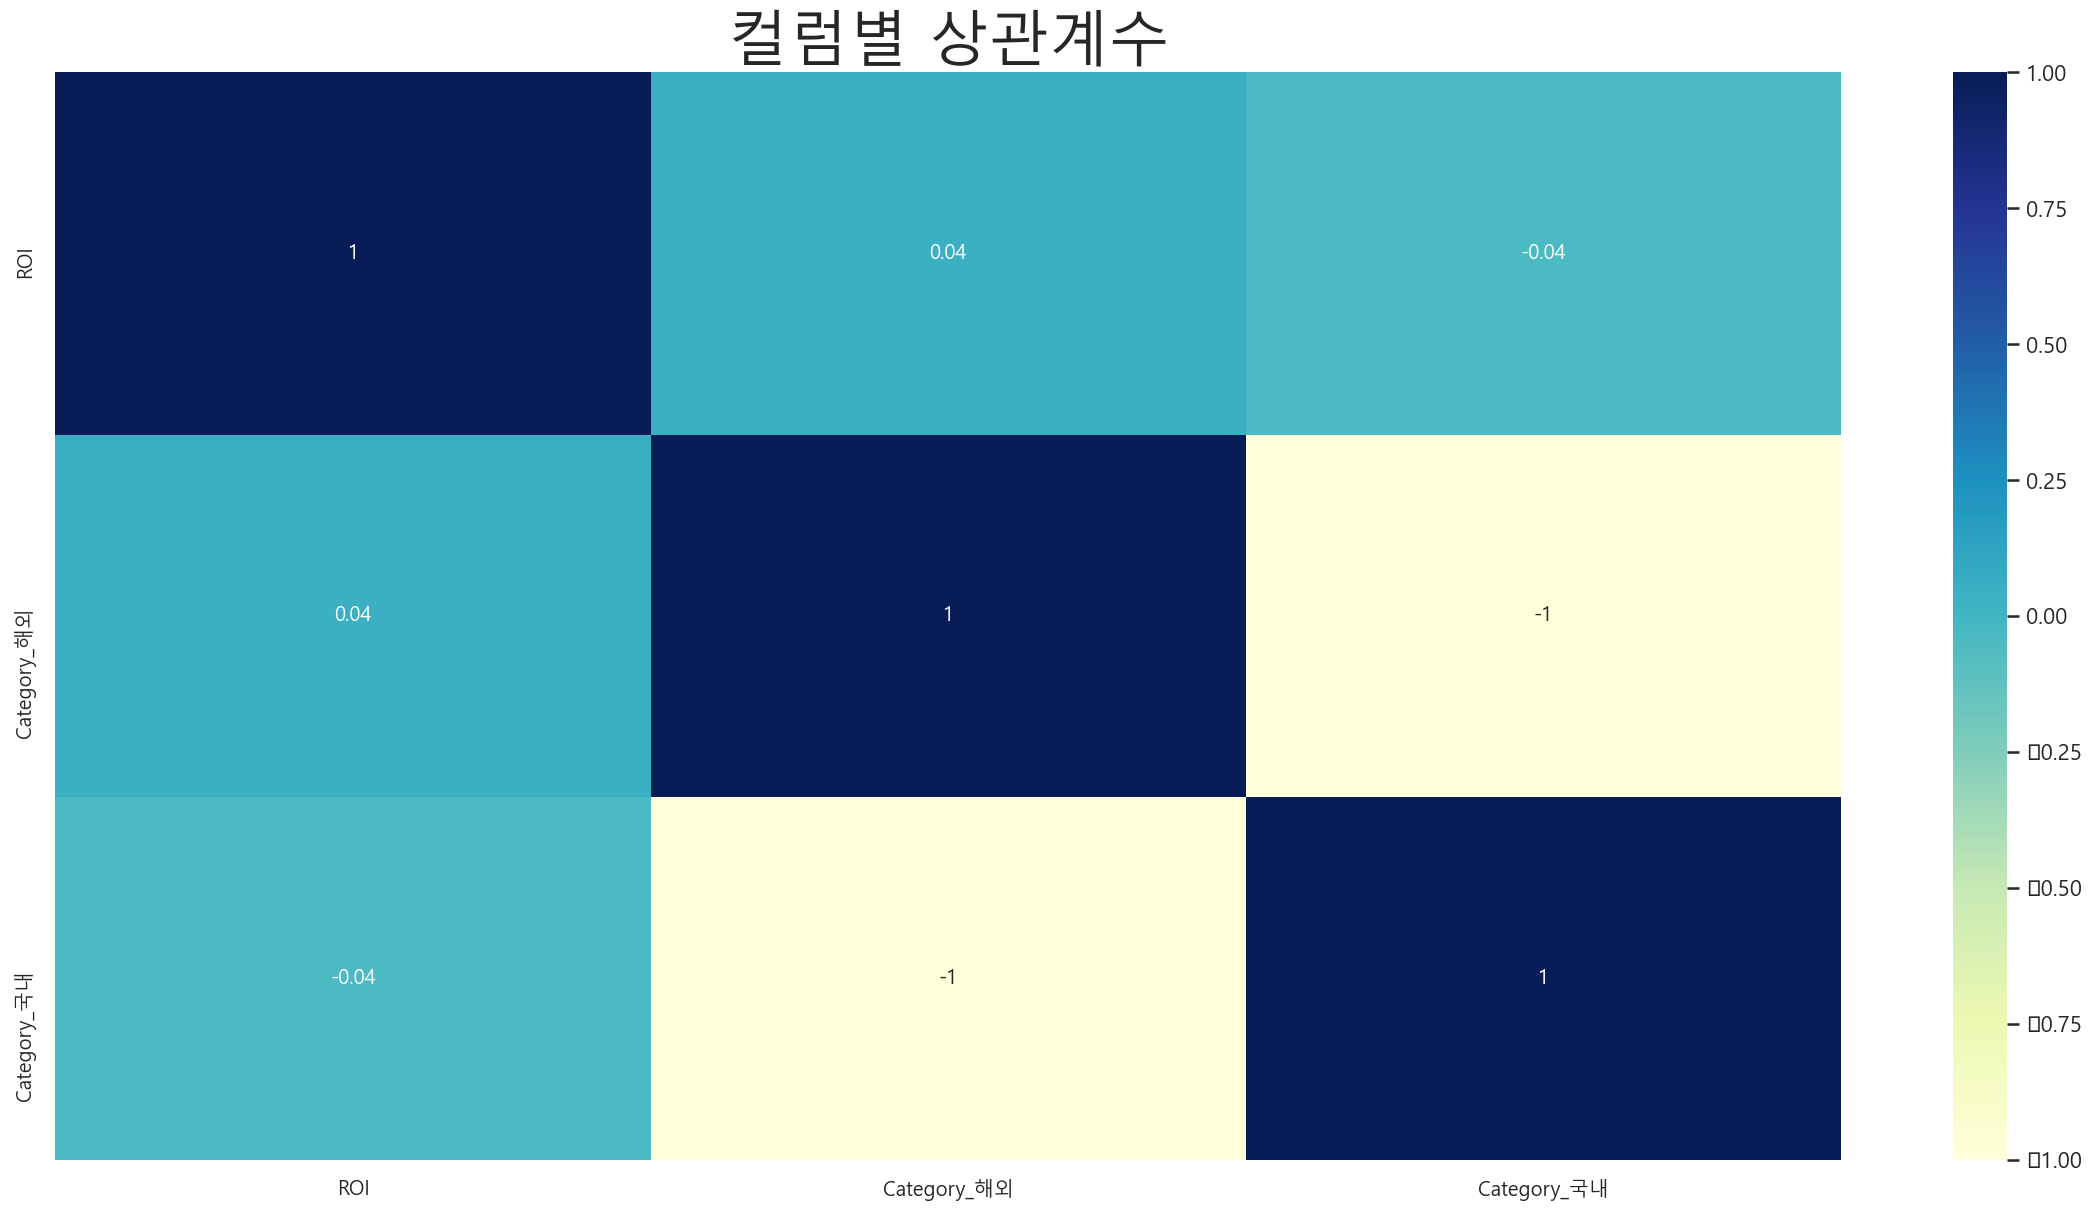

In [367]:
plt.figure(figsize=(20,10))
plt.title("컬럼별 상관계수", fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(data=round(reg1_onehot_fn.corr(),2), annot=True, cmap="YlGnBu", annot_kws={"size": 10})
plt.show()